In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
df = pd.read_csv('Amazon Sale Report.csv')

C:\Users\mathe\AppData\Local\Temp\ipykernel_7744\2474663059.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


Tratar valores ausentes e duplicatas

In [10]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [80]:
df.head()

Category
Set              7004
kurta            6136
Western Dress    4439
Top              1427
Ethnic Dress      156
Bottom            123
Blouse             83
Saree              11
Name: count, dtype: int64

In [86]:
qtySum = df.Qty.sum()
amountSum = df.Amount.sum()
QtyCategory = df.Category.value_counts()
topCategory = QtyCategory.idxmax()
statusValues = df.Status.value_counts()
B2BValues = df.B2B.value_counts()
top_5_states = df['ship-state'].value_counts().nlargest(5)
df['Date'] = pd.to_datetime(df['Date'])
df['MonthYear'] = df['Date'].dt.strftime('%Y-%m')
DeliveredCategory = df[df['Status'] == 'Shipped - Delivered to Buyer']



<>:10: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
<>:10: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
C:\Users\mathe\AppData\Local\Temp\ipykernel_7744\904418685.py:10: SyntaxWarning: str indices must be integers or slices, not str; perhaps you missed a comma?
  DeliveredCategory = df[df['Status'] == 'Shipped - Delivered to Buyer'['QtyCategory']]


TypeError: string indices must be integers, not 'str'

Distribuição dos Status de Entrega

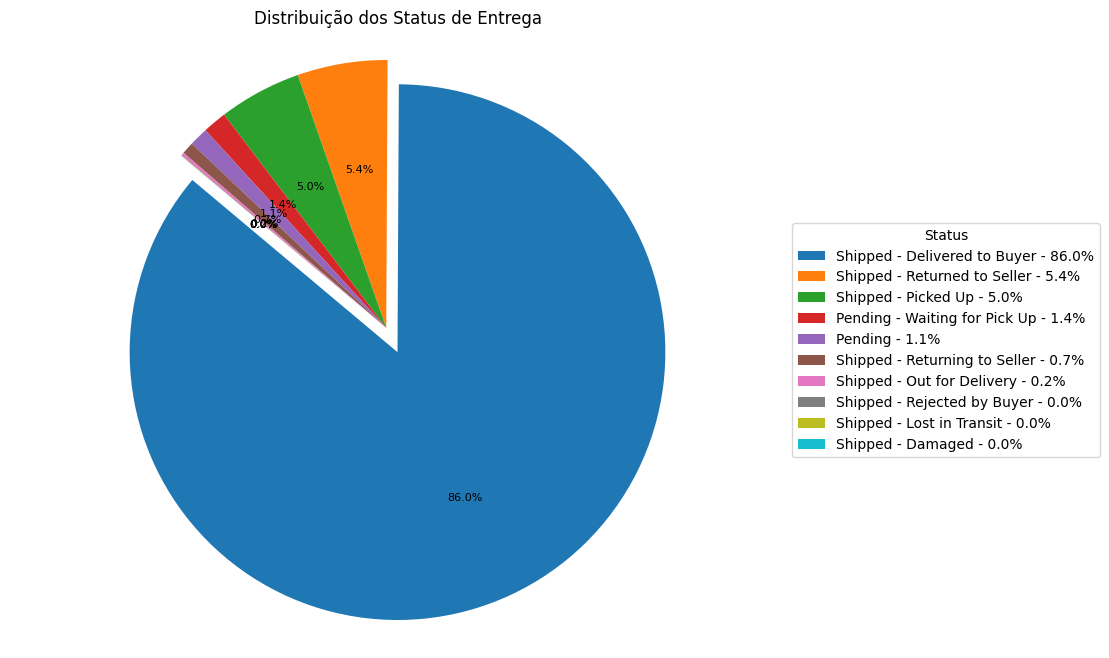

In [21]:
labels = statusValues.index
sizes = statusValues.values
explode = [0.1 if label == 'Shipped - Delivered to Buyer' else 0 for label in labels]
percentages = [f'{size / sum(sizes) * 100:.1f}%' for size in sizes]
labels_with_percentages = [f'{label} - {percentage}' for label, percentage in zip(labels, percentages)]

plt.figure(figsize=(10,8))
wedges, texts, autotexts = plt.pie(sizes, autopct='%1.1f%%',startangle=140, explode=explode, textprops=dict(color="black"))

for autotext in autotexts:
    autotext.set_fontsize(8)

plt.axis('equal')
plt.legend(wedges, labels_with_percentages, title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribuição dos Status de Entrega')
plt.show()

Categorias


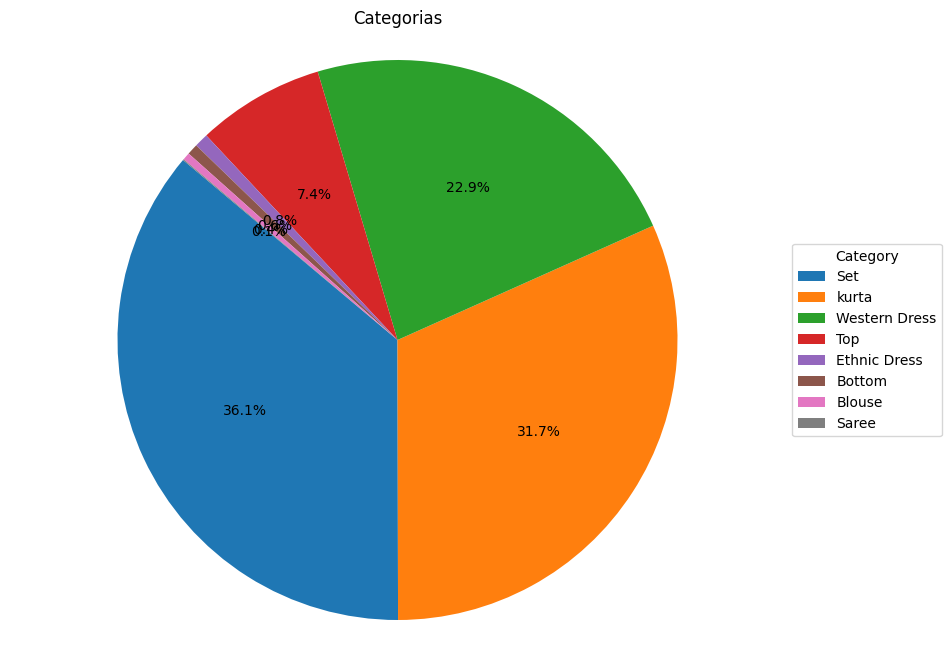

In [ ]:
QtyCategory
plt.figure(figsize=(10,8))

wedges, texts, autotexts = plt.pie(QtyCategory.values, autopct='%1.1f%%',startangle=140, textprops=dict(color='black'))

for autotext in autotexts:
    autotext.set_fontsize(10)

plt.title('Categorias')
plt.axis('equal')
plt.legend(wedges, QtyCategory.index, title="Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Volume de Vendas:

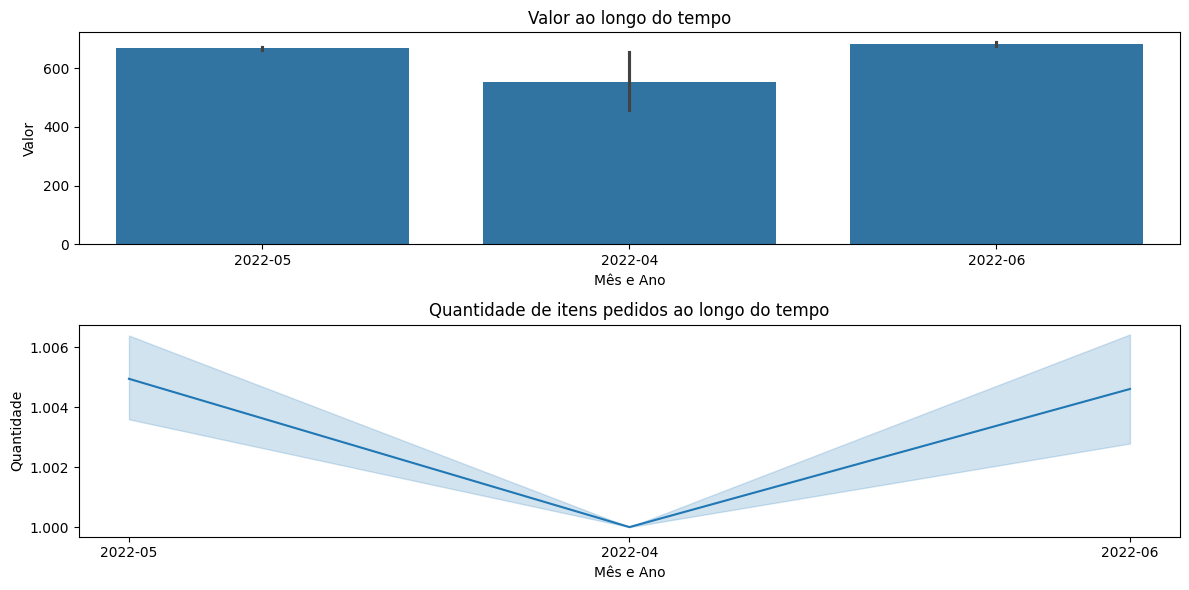

In [92]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

sns.barplot(x='MonthYear', y='Amount', data=df, ax=axs[0])
axs[0].set_title('Valor ao longo do tempo')
axs[0].set_xlabel('Mês e Ano')
axs[0].set_ylabel('Valor')

sns.lineplot(x='MonthYear', y='Qty', data=df, ax=axs[1])
axs[1].set_title('Quantidade de itens pedidos ao longo do tempo')
axs[1].set_xlabel('Mês e Ano')
axs[1].set_ylabel('Quantidade')

plt.tight_layout()

plt.show()

Quantidade de categorias

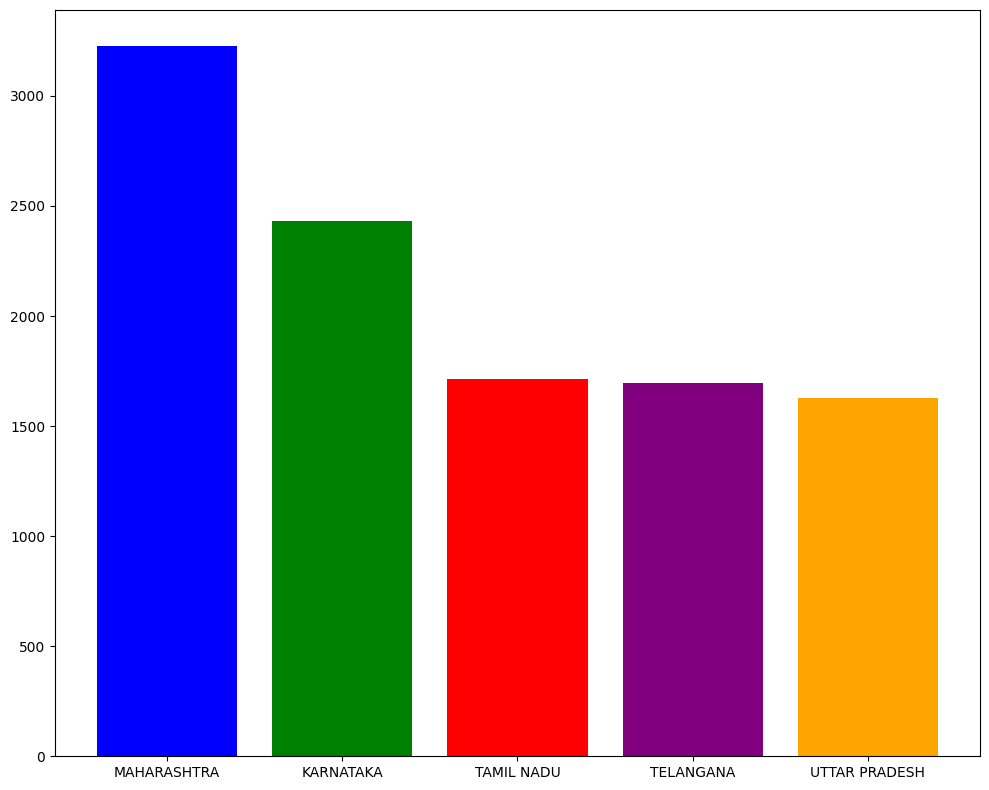

In [105]:
cores = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(10,8))
plt.bar(top_5_states.index,top_5_states.values, color=cores)

plt.tight_layout()
plt.show()